In [1]:
import numpy
import spacy
import pandas as pd

In [2]:
# Read in csv as DF.
df = pd.read_csv("amazon_product_reviews.csv")
df.head()

id             dateAdded           dateUpdated  \
0  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
1  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
2  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
3  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
4  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   

                                                name                  asins  \
0  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
1  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
2  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
3  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
4  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   

          brand                                         categories  \
0  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   
1  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   
2  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   
3  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   
4  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   

  primaryCategories                                          imageURLs  \
0   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   
1   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   
2   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   
3   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   
4   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   

                                                keys  ... reviews.didPurchase  \
0  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   
1  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   
2  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   
3  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   
4  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   

  reviews.doRecommend reviews.id reviews.numHelpful reviews.rating  \
0                 NaN        NaN                NaN              3   
1                 NaN        NaN                NaN              4   
2                 NaN        NaN                NaN              5   
3                 NaN        NaN                NaN              5   
4                 NaN        NaN                NaN              5   

                                  reviews.sourceURLs  \
0  https://www.amazon.com/product-reviews/B00QWO9...   
1  https://www.amazon.com/product-reviews/B00QWO9...   
2  https://www.amazon.com/product-reviews/B00QWO9...   
3  https://www.amazon.com/product-reviews/B00QWO9...   
4  https://www.amazon.com/product-reviews/B00QWO9...   

                                        reviews.text  \
0  I order 3 of them and one of the item is bad q...   
1  Bulk is always the less expensive way to go fo...   
2  Well they are not Duracell but for the price i...   
3  Seem to work as well as name brand batteries a...   
4  These batteries are very long lasting the pric...   

                                       reviews.title  reviews.username  \
0  ... 3 of them and one of the item is bad quali...        Byger yang   
1  ... always the less expensive way to go for pr...              ByMG   
2  ... are not Duracell but for the price i am ha...  BySharon Lambert   
3  ... as well as name brand batteries at a much ...     Bymark sexson   
4  ... batteries are very long lasting the price ...           Bylinda   

                                          sourceURLs  
0  https://www.barcodable.com/upc/841710106442,ht...  
1  https://www.barcodable.com/upc/841710106442,ht...  
2  https://www.barcodable.com/upc/841710106442,ht...  
3  htt

Cleaning

Clean data so it's ready for analysis and select only relevant columns.

In [3]:
# Select only the necessary columns for sentiment analysis.
cleaned = df[['reviews.text', 'reviews.title']]
cleaned.head()

reviews.text  \
0  I order 3 of them and one of the item is bad q...   
1  Bulk is always the less expensive way to go fo...   
2  Well they are not Duracell but for the price i...   
3  Seem to work as well as name brand batteries a...   
4  These batteries are very long lasting the pric...   

                                       reviews.title  
0  ... 3 of them and one of the item is bad quali...  
1  ... always the less expensive way to go for pr...  
2  ... are not Duracell but for the price i am ha...  
3  ... as well as name brand batteries at a much ...  
4  ... batteries are very long lasting the price ...

In [4]:
# Check for any null values.
cleaned.isnull().sum()

reviews.text     0
reviews.title    0
dtype: int64

In [5]:
# Load the English language model.
nlp = spacy.load('en_core_web_md')

Preprocess

In [6]:
# Lemmatize text and filter out punctuation and stop words.
cleaned['processed.text'] = cleaned['reviews.text'].apply(lambda sample: ' '.join([token.lemma_.lower() for token in nlp(sample.strip()) if not token.is_punct and not token.is_stop]))
cleaned.head()

C:\Users\richi\AppData\Local\Temp\ipykernel_16124\3313645979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['processed.text'] = cleaned['reviews.text'].apply(lambda sample: ' '.join([token.lemma_.lower() for token in nlp(sample.strip()) if not token.is_punct and not token.is_stop]))


reviews.text  \
0  I order 3 of them and one of the item is bad q...   
1  Bulk is always the less expensive way to go fo...   
2  Well they are not Duracell but for the price i...   
3  Seem to work as well as name brand batteries a...   
4  These batteries are very long lasting the pric...   

                                       reviews.title  \
0  ... 3 of them and one of the item is bad quali...   
1  ... always the less expensive way to go for pr...   
2  ... are not Duracell but for the price i am ha...   
3  ... as well as name brand batteries at a much ...   
4  ... batteries are very long lasting the price ...   

                                      processed.text  
0  order 3 item bad quality miss backup spring pc...  
1                    bulk expensive way product like  
2                               duracell price happy  
3                      work brand battery well price  
4                      battery long last price great

Polarity

Gain insight into how positive or negative reviews are.

In [19]:
# Import necessary libraries for further analysis and add textblob
# Extension to spaCy pipeline.
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
nlp.add_pipe('spacytextblob')

In [20]:
# Function to calculate polarity and subjectivity of a text.
def polarity(sample):

    doc = nlp(sample)
    
    polarity_value = doc._.blob.polarity

    subjectivity_value = doc._.blob.subjectivity
    
    return sample, polarity_value, subjectivity_value

In [21]:
# Initialise dictionaries to count positive and negative words.
positive_words = defaultdict(int)
negative_words = defaultdict(int)

# Iterate over processed text samples to determine sentiment.
for item in cleaned['processed.text'].values:

    sample, polarity_score, subjectivity_score = polarity(item)

    if polarity_score > 0:
        sentiment = "Positive"
        positive_words[item] += 1

    elif polarity_score < 0:
        sentiment = "Negative"
        negative_words[item] += 1
    
    else:
        sentiment = "Neutral"

    print(f"Review: {sample}\nPolarity score: {polarity_score}\nSentiment: {sentiment}\nSubjectivity: {subjectivity_score}\n")

    

Review: order 3 item bad quality miss backup spring pc aluminum battery work
Polarity score: -0.6999999999999998
Sentiment: Negative
Subjectivity: 0.6666666666666666

Review: bulk expensive way product like
Polarity score: -0.5
Sentiment: Negative
Subjectivity: 0.7

Review: duracell price happy
Polarity score: 0.8
Sentiment: Positive
Subjectivity: 1.0

Review: work brand battery well price
Polarity score: 0.0
Sentiment: Neutral
Subjectivity: 0.0

Review: battery long last price great
Polarity score: 0.25
Sentiment: Positive
Subjectivity: 0.4055555555555556

Review: buy lot battery christmas amazonbasics cell good notice difference brand battery amazon basic brand lot easy purchase arrive house hand buy
Polarity score: 0.37777777777777777
Sentiment: Positive
Subjectivity: 0.5194444444444445

Review: ve problame battery order past pleased
Polarity score: 0.125
Sentiment: Positive
Subjectivity: 0.625

Review: look cheap non rechargeable battery perfect
Polarity score: 0.7
Sentiment: Posit

(-0.5, 399.5, 199.5, -0.5)

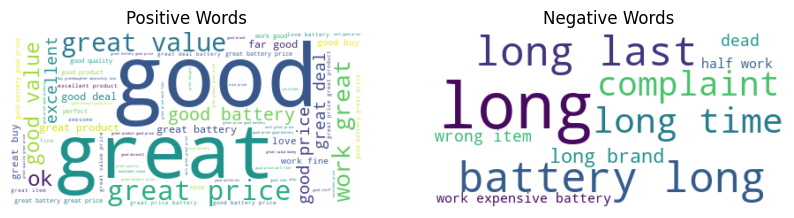

In [22]:
# Word clouds for positive and negative words.
pos_wordcloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(positive_words)
neg_wordcloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(negative_words)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(pos_wordcloud, interpolation='bilinear')
ax[0].set_title('Positive Words')
ax[0].axis('off')

ax[1].imshow(neg_wordcloud, interpolation='bilinear')
ax[1].set_title('Negative Words')
ax[1].axis('off')

Similarity Function

Compare the similarity between two reviews.

In [29]:
# Function to calculate similarity between two reviews.
def review_similarity(review_1, review_2):
    
    return nlp(review_1).similarity(nlp(review_2))

# Select two reviews from the cleaned DataFrame.
review_1 = cleaned["processed.text"][0]
review_2 = cleaned["processed.text"][1]

# Calculate the similarity between the selected reviews.
similarity_score = review_similarity(review_1, review_2)

print(f"The similarity between the two reviews is: {similarity_score}")

The similarity between the two reviews is: 0.6723680263740296
